In [1]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [2]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

In [3]:
pipeline = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype = torch.float16, use_safetensors = True)

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
'cuda' if torch.cuda.is_available() else 'cpu'

'cuda'

In [4]:
pipeline.to('cuda')

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "dreamlike-art/dreamlike-diffusion-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": null,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [8]:
prompt = """A powerful businessman ,traveling in Rolls royce,with his bodyguards,
            wearing a suit of black color, and watching anime in car"""

In [10]:
image1 =  pipeline(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  A powerful businessman ,traveling in Rolls royce,with his bodyguards,
            wearing a suit of black color, and watching anime in car


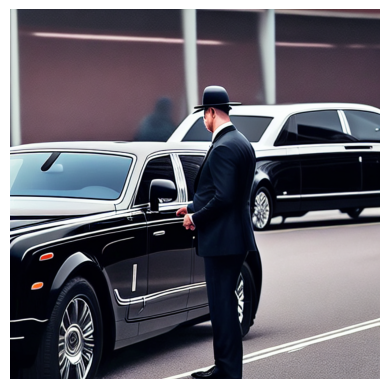

In [12]:
print("[PROMPT]: ",prompt)
plt.imshow(image1);
plt.axis('off');

In [13]:
prompt_2 = """ A rebel man in dense jungle, travelling with his group, all carying guns in their hands,
               make sure to make them dangerous, along with them a women chained in chains is also walking"""

In [15]:
image2 = pipeline(prompt_2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:   A rebel man in dense jungle, travelling with his group, all carying guns in their hands,
               make sure to make them dangerous, along with them a women chained in chains is also walking


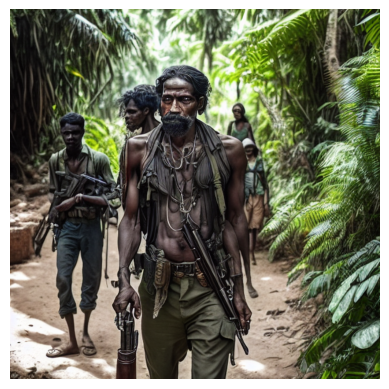

In [16]:
print('[PROMPT]: ',prompt_2)
plt.imshow(image2);
plt.axis('off');

In [24]:
def generate_img(pipe,prompt,params):
  img = pipe(prompt,**params).images

  num_images = len(img)

  if num_images > 1:
    fig, ax = plt.subplot(1,num_images)
    for i in range(num_images):
      ax[i].imshow(img[i])
      ax[i].axis('off')
      plt.show()
  else:

    plt.figure(figsize=(20,20))
    plt.show()

In [21]:
params = {}

In [25]:
generate_img(pipeline,prompt_2,params)

  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 2000x2000 with 0 Axes>